# Lista de Exercícios – 02

## Interpolação e Ajuste de Curvas

In [1]:
from numpy import array, zeros, linspace, polyval, linalg, concatenate, mean
import matplotlib.pyplot as plt

### 1. Polinômio interpolador utilizando a matriz de Vandermonde para o conjunto de pontos {(−2, −47),(0, −3),(1, 4),(2, 41)}

In [2]:
data_x = array([-2.,0.,1.,2.])
data_y = array([-47.,-3.,4.,41.])

num_points = len(data_x)

polynomial_degree = num_points - 1

print("O grau do polinômio interpolador é " + str(polynomial_degree))

O grau do polinômio interpolador é 3


In [3]:
matrix = zeros([num_points, num_points])

for i in range(num_points):
    for j in range(num_points):
        matrix[j][i] = data_x[j]**(polynomial_degree-i)

print("A matrix the Vandermonde para os pontos fornecidos:")
print(matrix)

A matrix the Vandermonde para os pontos fornecidos:
[[-8.  4. -2.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]]


In [4]:
coeff = linalg.solve(matrix,data_y)
print("O polinômio interpolador é f(x) = ", coeff[0], "x³ +", coeff[1], "x² +", coeff[2], "x +", coeff[3])

O polinômio interpolador é f(x) =  5.0 x³ + 0.0 x² + 2.0 x + -3.0


In [5]:
poly_x = linspace(-5, 5, 100)
poly_y = polyval(coeff,poly_x)

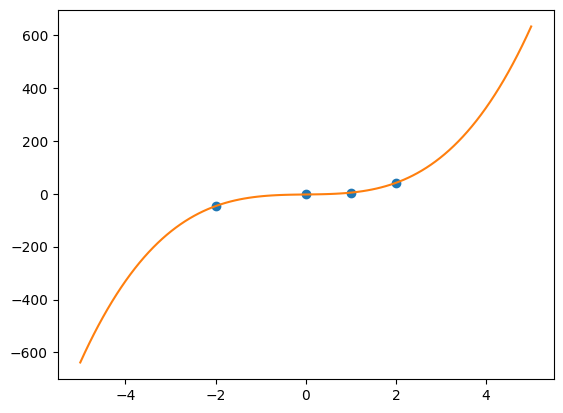

In [6]:
plt.plot(data_x,data_y, "o")
plt.plot(poly_x,poly_y)
plt.show()

### 2. Polinômio interpolador via Lagrange que modele esse problema e aproxime a taxa de juros no segundo mês.

#### Dados:

||$M_1$|$M_2$|$M_3$|$M_4$|$M_5$|$M_6$|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|tempo(meses)|1|2|3|4|5|6|
|taxa juros(%)|1.22|x|1.24|1.29|1.19|1.25|



In [7]:
interest_rate = array([1.22,1.24,1.29,1.19,1.25])
month_list = array([1,3,4,5,6])

num_months = len(month_list)

polynomial_degree_l = num_months - 1

print("O grau do polinômio interpolador é ", polynomial_degree_l)

O grau do polinômio interpolador é  4


In [8]:
def calculate_basis_poly(i, month, month_list):
    poly = 1.
    for j in range(len(month_list)):
        if i != j:
            frac_top = month - month_list[j]
            frac_bot = month_list[i] - month_list[j]

            poly *= frac_top/frac_bot
            
    return poly

In [9]:
L = 0.
month = 2 #num of month we're looking for

for i in range(num_months):
    L += interest_rate[i] * calculate_basis_poly(i, month, month_list)

print("O valor da taxa de juros do mês",month," é, aproximadamente : ",L)

O valor da taxa de juros do mês 2  é, aproximadamente :  1.084


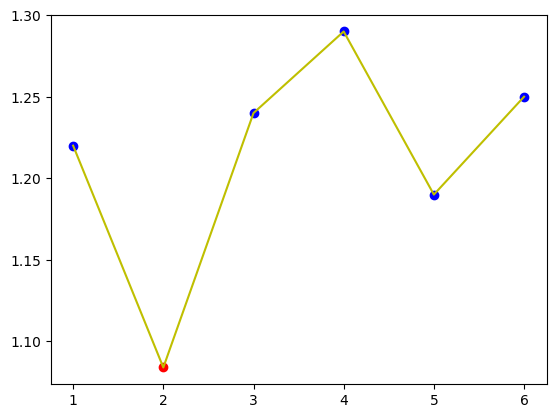

In [10]:
a_1 = array([month_list[0], month])
a_2 = month_list[1:num_months]

final_month_list = concatenate([a_1, a_2])

a_1 = array([interest_rate[0], L])
a_2 = interest_rate[1:num_months]

final_interest_rate_list = concatenate([a_1, a_2])

plt.plot(month_list, interest_rate, "bo")
plt.plot(month, L, "ro")
plt.plot(final_month_list, final_interest_rate_list, "y")
plt.show()

### Ajuste por uma reta os pontos da questão 2, e estime a taxa de juros no mês 12 utilizando a reta encontrada.

In [11]:
def calculate_dif_mean(w_list):
    w = mean(w_list)
    num_w = len(w_list)

    dif_mean_w = zeros(num_w)
    for i in range(num_w-1):
        dif_mean_w[i] = w_list[i] - w
    return dif_mean_w

def calculate_sum_dif_sqr(w_list):
    dif_mean_w = calculate_dif_mean(w_list)
    dif_sqr_w = [i**2 for i in dif_mean_w]
    sum_dif_sqr_w = sum(dif_sqr_w)
    return sum_dif_sqr_w

def sum_prod_dif_a_b(a_list,b_list):
    dif_mean_a = calculate_dif_mean(a_list)
    dif_mean_b = calculate_dif_mean(b_list)

    dif_prod = dif_mean_a * dif_mean_b
    return sum(dif_prod)

def min_sqr_formula(m,x,c):
    return m * x + c

def calculate_min_squares(month_list,interest_rate, month):
    dif_mean_x = calculate_dif_mean(month_list)
    dif_mean_y = calculate_dif_mean(interest_rate)

    sum_dif_sqr_x = calculate_sum_dif_sqr(month_list)
    
    sum_prod_dif_x_y = sum_prod_dif_a_b(month_list,interest_rate)

    coef_ang = sum_prod_dif_x_y/sum_dif_sqr_x
    coef_lin = mean(interest_rate) - coef_ang/sum_dif_sqr_x

    return min_sqr_formula(coef_ang, month, coef_lin)


min_sqr_month_12 = calculate_min_squares(final_month_list,final_interest_rate_list, 12)

print("A taxa de juros no mês 12 encontrada utilizando o método dos mínimos quadrados é: ", min_sqr_month_12)


A taxa de juros no mês 12 encontrada utilizando o método dos mínimos quadrados é:  1.3868531687242802


#### Compare este resultado com a estimação da taxa de juros utilizando o polinômio interpolador encontrado na solução da questão 2.

In [12]:
q3_L = 0.
q3_month = 12 #num of month we're looking for

for i in range(len(final_month_list)):
    q3_L += final_interest_rate_list[i] * calculate_basis_poly(i, q3_month, final_month_list)

print("A taxa de juros no mês 12 encontrada utilizando o polinômio de Lagrange é: ", q3_L)

A taxa de juros no mês 12 encontrada utilizando o polinômio de Lagrange é:  66.93400000000065


Lagrange não é tão efetivo quando utilizado para "prever" valores.

Isso é notável quando observamos a diferença entre o ponto gerando utilizando MMQ (em rosa) e Lagrange (em verde) comparados aos outros:

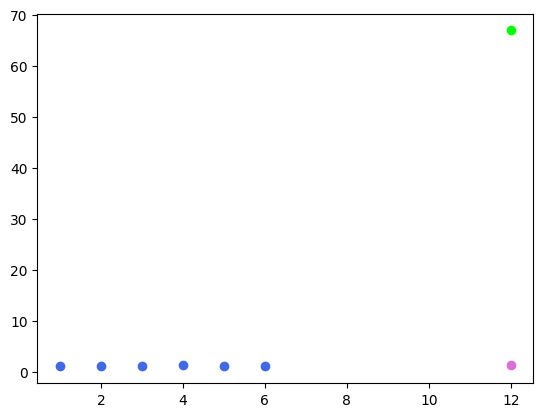

In [13]:
plt.plot(q3_month, q3_L,"o", color="lime")
plt.plot(q3_month, min_sqr_month_12, "o", color="orchid")
plt.plot(final_month_list, final_interest_rate_list, "o", color = "royalblue")
plt.show()

### Conjunto de pontos = {(0.23, −0.54),(−0.30, −0.54),(0.04, −0.57)}:

In [14]:
q4_data_x = array([0.23,-0.3,0.04])
q4_data_y = array([-0.54,-0.54,-0.57])

#### A função f(x) = ax + b que melhor se ajusta no sentido de mínimos quadrados aos pontos dados.

In [15]:
def min_squares_poly_1_degree(x_list,y_list):
    dif_mean_x = calculate_dif_mean(x_list)
    dif_mean_y = calculate_dif_mean(y_list)

    sum_dif_sqr_x = calculate_sum_dif_sqr(x_list)
    
    sum_prod_dif_x_y = sum_prod_dif_a_b(x_list,y_list)

    coef_ang = sum_prod_dif_x_y/sum_dif_sqr_x
    coef_lin = mean(y_list) - coef_ang/sum_dif_sqr_x

    return coef_ang, coef_lin

a,b = min_squares_poly_1_degree(q4_data_x, q4_data_y)

print("f(x) = ",round(a,5),"* x + ",round(b,5))

f(x) =  -0.00353 * x +  -0.5251


#### A função f(x) = ax² + bx + c que melhor se ajusta no sentido de mínimos quadrados aos pontos dados.

In [16]:
def min_squares_poly_2_degree(x_list, y_list):
    x_sqr_list = [x**2 for x in x_list]
    x_cube_list = [x**3 for x in x_list]
    x_fourth_list = [x**4 for x in x_list]
    x_sqr_y_list = [x**2 * y for x, y in zip(x_list, y_list)]
    x_y_list = [x * y for x, y in zip(x_list, y_list)]

    x_mean = mean(x_list)
    x_sqr_mean = mean(x_sqr_list)
    y_mean = mean(y_list)

    x_sum = sum(x_list)
    x_sqr_sum = sum(x_sqr_list)
    x_cube_sum = sum(x_cube_list)
    y_sum = sum(y_list)
    x_sqr_y_sum = sum(x_sqr_y_list)
    x_y_sum = sum(x_y_list)
    x_fourth_sum = sum(x_fourth_list)

    coef_sqr = (x_sqr_y_sum - x_sqr_sum * y_sum)/ (x_fourth_sum - (x_sqr_sum)**2)
    coef_lin =(x_sqr_sum *x_sqr_y_sum - x_cube_sum * x_y_sum)/(x_fourth_sum - (x_sqr_sum)**2)
    coef_cons =(y_sum-coef_sqr*x_sqr_sum-coef_lin * x_sum)/len(x_list)

    return coef_sqr, coef_lin, coef_cons

a2,b2,c2 = min_squares_poly_2_degree(q4_data_x, q4_data_y)

print("f(x) = ",round(a2,5),"* x² + ",round(b2,5),"x +",round(c2,5))

f(x) =  -16.06799 * x² +  1.10837 x + 0.23503


#### O polinômio interpolador (via Lagrange ou Vandermonde).Então, faça um gráfico com os pontos e as funções encontradas.

In [17]:
q4_num_points = len(q4_data_x)
q4_polynomial_degree = q4_num_points - 1

q4_matrix = zeros([q4_num_points, q4_num_points])

for i in range(q4_num_points):
    for j in range(q4_num_points):
        q4_matrix[j][i] = q4_data_x[j]**(q4_polynomial_degree-i)

print("A matrix the Vandermonde para os pontos fornecidos:")
print(matrix)

q4_coeff = linalg.solve(q4_matrix,q4_data_y)


print("O polinômio interpolador é f(x) = ", q4_coeff[0], "x² +", q4_coeff[1], "x +", q4_coeff[2])

A matrix the Vandermonde para os pontos fornecidos:
[[-8.  4. -2.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]]
O polinômio interpolador é f(x) =  0.46439628482971995 x² + 0.032507739938080385 x + -0.5720433436532507


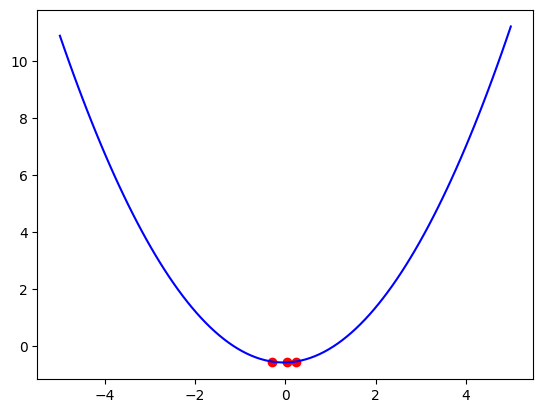

In [18]:
q4_poly_x = linspace(-5, 5, 100)
q4_poly_y = polyval(q4_coeff, poly_x)

plt.plot(q4_data_x, q4_data_y,"o", color="red")
plt.plot(q4_poly_x,q4_poly_y, color="blue")
plt.show()